# Linear Regression to estimate high-order epistasis

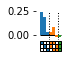

In [2]:
# Import a model and the plotting module
from gpmap import GenotypePhenotypeMap
from epistasis.models import EpistasisLinearRegression
from epistasis.pyplot import plot_coefs

# Genotype-phenotype map data.
wildtype = "AAA"

genotypes = ["AAA", "ATA", "TAA", "ATT", "TAT", "TTA", "TTT"]
phenotypes = [0.1, 0.4, 0.3, 0.3, 0.6, 0.8, 1.0]

gpm = GenotypePhenotypeMap(wildtype, genotypes, phenotypes)
# genotypes = ["AAA", "AAT", "ATA", "TAA", "ATT", "TAT", "TTA", "TTT"]
# phenotypes = [0.1, 0.2, 0.4, 0.3, 0.3, 0.6, 0.8, 1.0]

# Construct an epistasis model.
model = EpistasisLinearRegression(order=3)
model.add_gpm(gpm)

# Fit the model.
model.fit()

# loo
coef_sites = model.epistasis.sites # List of site indexes
coef_values = model.epistasis.values # List of coefficient values

# Plot figure.
fig, axes = plot_coefs(coef_sites, coef_values, figsize=(.5,.75), ybounds=(-.05, .25))
fig

In [3]:
from epistasis.simulate import LinearSimulation

In [6]:
sim = LinearSimulation.from_length(4)
sim.set_coefs_order(4)
sim.set_coefs_random((-1,1))

In [13]:
print(sim.epistasis.data.to_csv())

,sites,values
0,[0],0.5011910655025966
1,[1],-0.6000186681513706
2,[2],0.06498276930060931
3,[3],0.6091656756721153
4,[4],0.24209508436556937
5,"[1, 2]",0.2869142038187855
6,"[1, 3]",-0.26445514455225094
7,"[1, 4]",-0.4642116520437949
8,"[2, 3]",0.638260262428922
9,"[2, 4]",0.23598864236123118
10,"[3, 4]",0.7179538630349485
11,"[1, 2, 3]",-0.47312160287366267
12,"[1, 2, 4]",-0.04191888437610514
13,"[1, 3, 4]",-0.30912353449573415
14,"[2, 3, 4]",0.6066739725656609
15,"[1, 2, 3, 4]",-0.2689818206753505



In [15]:
model.to_json('test.json')